In [24]:
import numpy as np
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
import matplotlib.pyplot as plt

np.random.seed(123)

In [2]:
df = pd.read_csv('housing.data', delim_whitespace = True, header = None)
df.columns = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
import seaborn as sns

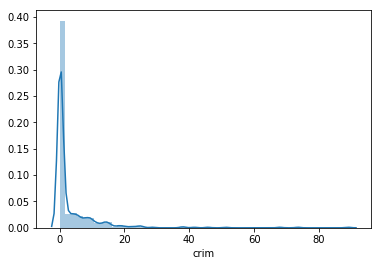

In [5]:
sns.distplot(df['crim'])

In [6]:
X = df.iloc[:,:13].values #nem medv oszlopok
Y = df.iloc[:,13].values #medv oszlop
Y.mean()

22.532806324110677

In [7]:
#szokásos bemásolva
valid_split=0.2
test_split=0.1

# train-validation-test minták különválasztása
X_train = X[0:int(X.shape[0]*(1-valid_split-test_split))]
Y_train = Y[0:int(X.shape[0]*(1-valid_split-test_split))]
X_valid = X[int(X.shape[0]*(1-valid_split-test_split)):int(X.shape[0]*(1-test_split))]
Y_valid = Y[int(X.shape[0]*(1-valid_split-test_split)):int(X.shape[0]*(1-test_split))]
X_test  = X[int(X.shape[0]*(1-test_split)):]
Y_test  = Y[int(X.shape[0]*(1-test_split)):]

# standardizálás
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

print("TRAIN mean es std:",np.mean(X_train), np.std(X_train))
print("VALID mean es std:",np.mean(X_valid), np.std(X_valid))
print("TEST mean es std:",np.mean(X_test), np.std(X_test))

TRAIN mean es std: 6.793542019435986e-17 1.0
VALID mean es std: 3.177477913486406 9.069741278493064
TEST mean es std: 1.5187721992475813 3.7276165295777224


In [68]:
es = EarlyStopping(patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='model_boston.hdf5', save_best_only=True, verbose=1)

model = Sequential()
model.add(Dropout(0.9, input_shape=(X.shape[1],)))
model.add(Dense(200))#, input_dim = X.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='sigmoid'))
#model.add(Dropout(0.5))
model.add(Dense(1))
#model.add(Activation('sigmoid')) #elrontja a kimenetet

adam = Adam(lr=0.001)
model.compile(loss='mse', optimizer=adam)

In [69]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_9 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 200)               2800      
_________________________________________________________________
activation_12 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 201       
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(X_train, Y_train, validation_data = (X_valid,Y_valid), epochs = 1000000000000, batch_size = 16, callbacks=[mcp,es])

Train on 354 samples, validate on 101 samples
Epoch 1/1000000000000
354/354 [==============================] - 1s 2ms/step - loss: 720.6106 - val_loss: 325.3551

Epoch 00001: val_loss improved from inf to 325.35513, saving model to model_boston.hdf5
Epoch 2/1000000000000
354/354 [==============================] - 0s 227us/step - loss: 601.2621 - val_loss: 271.4841

Epoch 00002: val_loss improved from 325.35513 to 271.48408, saving model to model_boston.hdf5
Epoch 3/1000000000000
354/354 [==============================] - 0s 185us/step - loss: 510.3994 - val_loss: 226.6703

Epoch 00003: val_loss improved from 271.48408 to 226.67029, saving model to model_boston.hdf5
Epoch 4/1000000000000
354/354 [==============================] - 0s 185us/step - loss: 427.6495 - val_loss: 193.5606

Epoch 00004: val_loss improved from 226.67029 to 193.56055, saving model to model_boston.hdf5
Epoch 5/1000000000000
354/354 [==============================] - 0s 181us/step - loss: 353.4700 - val_loss: 163.42

In [71]:
model = load_model('model_boston.hdf5')

In [72]:
test_err = model.evaluate(X_test, Y_test)
print("Test MSE: ", test_err)

51/51 [==============================] - 0s 9ms/step
Test MSE:  13.460069581574084


[(10, 30), (10, 30)]

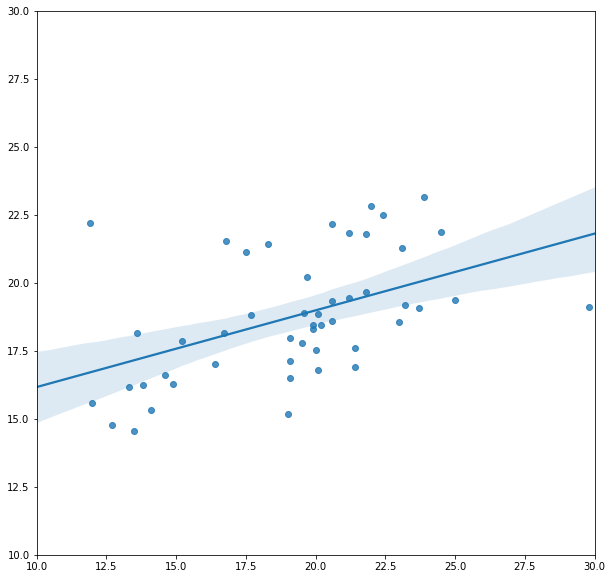

In [73]:
preds = model.predict(X_test)
plt.figure(figsize = (10,10))
sns.regplot(x=Y_test, y=preds.reshape(-1)).set(xlim = (10,30), ylim = (10,30)) # mennyire korelál a predikált és a valós

In [74]:
preds_mean = np.mean(Y_train)

In [75]:
print(preds_mean)

25.05593220338983


In [76]:
from sklearn.metrics import mean_squared_error
err_mean_train = mean_squared_error(Y_train, preds_mean * np.ones(Y_train.shape[0]))
err_mean_valid = mean_squared_error(Y_valid, preds_mean * np.ones(Y_valid.shape[0]))
err_mean_test = mean_squared_error(Y_test, preds_mean * np.ones(Y_test.shape[0]))

In [77]:
print("Mean predikció MSE TRAIN:",err_mean_train)
print("Mean predikció MSE VALID:",err_mean_valid)
print("Mean predikció MSE TEST:",err_mean_test)

Mean predikció MSE TRAIN: 70.98721057167481
Mean predikció MSE VALID: 176.18159459697762
Mean predikció MSE TEST: 59.09335107671335
